### Simulation

In [80]:
from bmc.simulate import simulate
import numpy as np
import matplotlib.pyplot as plt

In [81]:
low = -20e-6
high = 20e-6
n_iso = 1000
z_pos = np.linspace(low, high, n_iso)
z_pos = np.append(z_pos, 0)
z_pos = np.sort(z_pos)
# z_pos = np.random.permutation(z_pos)

In [82]:
# seq_path_gauss = 'seq_lib/1_ETM_8ppm.seq'
seq_path_gauss = 'seq_lib/RACETE.seq'


config_path = 'sim_lib/config_1pool.yaml'

adc_time = 20e-3
retun_zmag = False
show_plot = False
n_backlog =  3 #'ALL'
webhook = False
plt_range = [0, 4]
iso_select = [-5,0,5]

samples = 1500

In [83]:
sim = simulate(config_file=config_path, 
                   seq_file=seq_path_gauss, 
                   adc_time=adc_time,
                   z_positions=z_pos,
                   return_zmag=retun_zmag,
                   iso_select=iso_select,
                   show_plot=show_plot,
                   n_backlog=n_backlog,
                   webhook=webhook,
                   plt_range=plt_range)  # simulation mac

BMCTool simulation: 100%|██████████| 7/7 [00:56<00:00,  8.11s/it]

['gz at 0.0000s', 'rf at 0.0800s', 'gz at 0.0820s', 'adc at 0.0850s']


In [5]:
# sim.print_params()

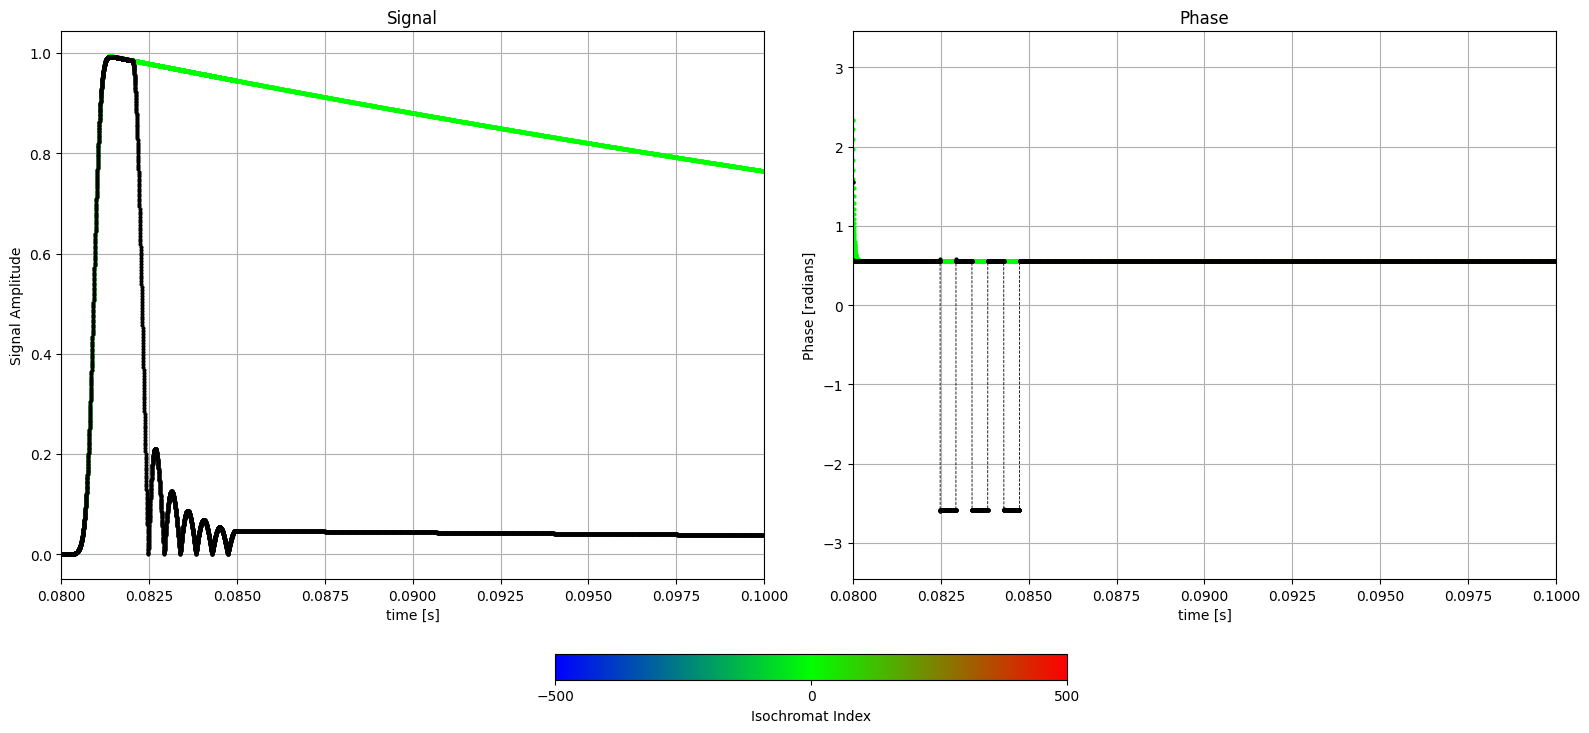

In [84]:
# %matplotlib widget
from bmc.utils.eval import plot_sim
time, m_z, m_z_total, m_c, m_c_total = sim.get_mag(return_cest_pool=False)

iso_select = [0]
plt_range = [0.0, 0.0353] #1ETM
# plt_range = [0.0675, 0.074] #5ETM
# plt_range = [0.1250, 0.141] #10ETM
# plt_range = [0.0675, 0.09]
# plt_range = [0.08, 0.1]
plt_range = [0.08, 0.1]

# _ = plot_sim(m_out=[m_z, m_z_total], time=time, plt_range=plt_range, iso_select=iso_select)
fig = plot_sim(m_out=[m_c, m_c_total], time=time, plt_range=plt_range, iso_select=iso_select)

m_trans_plus = np.abs(m_c_total)[-3 * samples:]
m_z_plus = m_z_total

# fig.savefig("/Users/danielmiksch/Downloads/STE_grad_signal.png", dpi=300, bbox_inches='tight')

### Animation

In [7]:
run_time = .1
track_path = False
ie = False
timing = False
total_mag = False
animate_cest = False
kwargs = {'quality': '-qh', 'write': '--write_to_movie'}  #--write_to_movie

In [8]:
# sim.animate(run_time=run_time, 
#             track_path=track_path, 
#             ie=ie, 
#             timing=timing,
#             total_mag=total_mag,
#             animate_cest=animate_cest,
#             **kwargs)

In [9]:
# seq_path_gauss = 'seq_lib/1_ETM_8ppm_minus.seq'
seq_path_gauss = 'seq_lib/RACETE_minus.seq'

In [10]:
sim_minus = simulate(config_file=config_path, 
                   seq_file=seq_path_gauss, 
                   adc_time=adc_time,
                   z_positions=z_pos,
                   return_zmag=retun_zmag,
                   iso_select=iso_select,
                   show_plot=show_plot,
                   n_backlog=n_backlog,
                   webhook=webhook,
                   plt_range=plt_range)  # simulation mac

BMCTool simulation: 100%|██████████| 7/7 [00:09<00:00,  1.38s/it]

['delay at 0.0000s', 'rf at 0.0800s', 'delay at 0.0820s', 'adc at 0.0825s']


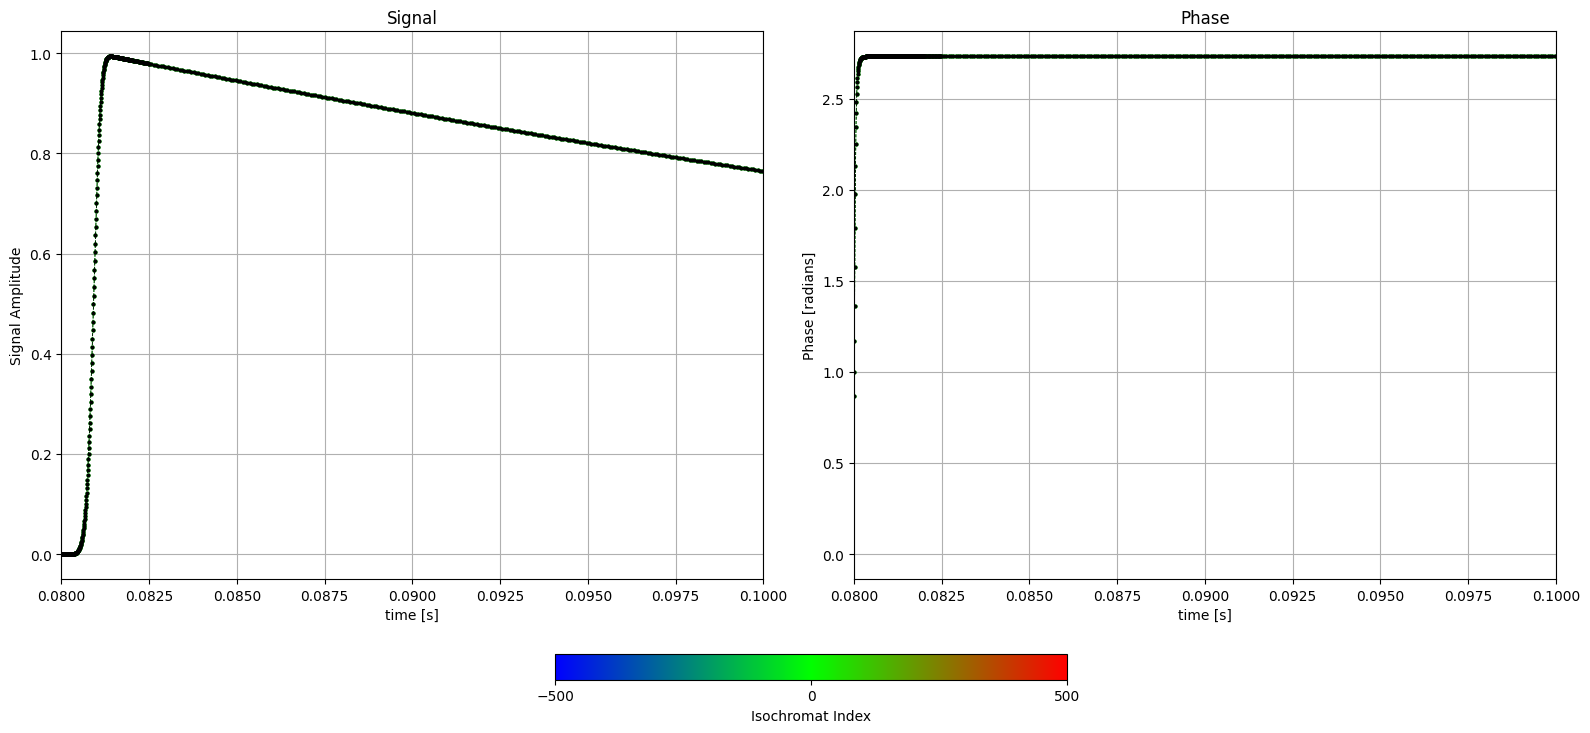

In [11]:
from bmc.utils.eval import plot_sim
time, m_z, m_z_total, m_c, m_c_total = sim_minus.get_mag(return_cest_pool=False)


iso_select = [0]
plt_range = [0.0, 0.0353] #1ETM
# plt_range = [0.0675, 0.074] #5ETM
# plt_range = [0.0286, 0.0360]
# plt_range = [0.0675, 0.09]
# plt_range = [0.8275, 1.048] #wex
# plt_range = [0.08, 0.11]
plt_range = [0.08, 0.1]


# _ = plot_sim(m_out=[m_z, m_z_total], time=time, plt_range=plt_range, iso_select=iso_select)
_ = plot_sim(m_out=[m_c, m_c_total], time=time, plt_range=plt_range, iso_select=iso_select)

m_trans_minus = np.abs(m_c_total)[-3 * samples:]

n_iso: 1001


BMCTool simulation: 100%|██████████| 7/7 [00:12<00:00,  1.72s/it]


['rf at 0.0000s', 'gz at 0.0020s', 'adc at 0.0025s']


BMCTool simulation: 100%|██████████| 7/7 [00:12<00:00,  1.76s/it]


['rf at 0.0000s', 'gz at 0.0020s', 'adc at 0.0025s']


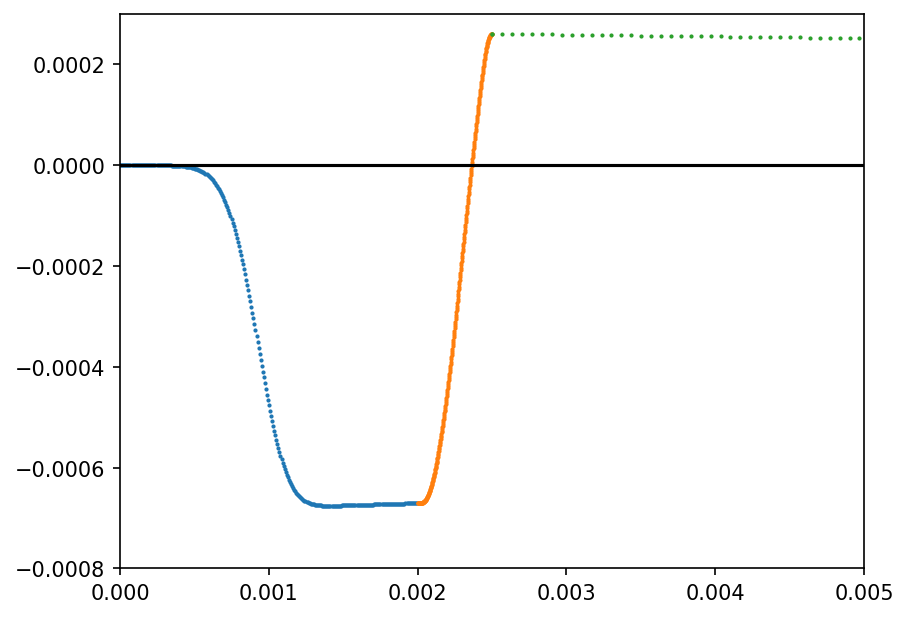

0.00026100842592937496


In [23]:
# %matplotlib widget
from bmc.utils.tex_variation import run_variation_parallel
import numpy as np
import matplotlib.pyplot as plt

# seq_on = 'seq_lib/1_ETM_8ppm.seq'
# seq_off = 'seq_lib/1_ETM_8ppm_minus.seq'
seq_on = 'seq_lib/RACETE.seq'
seq_off = 'seq_lib/RACETE_minus.seq'
# seq_on = 'seq_lib/ETM_optimized.seq'
# seq_off = 'seq_lib/ETM_optimized_minus.seq'
config_path = 'sim_lib/config_1pool.yaml'

adc_time = 20e-3
webhook = False

low = -20e-6
high = 20e-6 
n_iso = 1000
z_pos = np.linspace(low, high, n_iso)
z_pos = np.append(z_pos, 0)
z_pos = np.sort(z_pos)

samples = 300

print(f'n_iso: {len(z_pos)}')
_, singal, fig = run_variation_parallel(seq_on, seq_off, config_path, adc_time, z_pos, webhook, show_plot=True, save_plot=False)
# fig.savefig(f"/Users/danielmiksch/Downloads/racete_{samples}_0ppm.png", dpi=300, bbox_inches='tight')
print(singal)

In [ ]:
0.00022948618449500767
(0.0002540788898912968 - 0.00022948618449500767) / 0.00022948618449500767

0.10716420881895893

In [ ]:
#%matplotlib widget

# signal = np.array([
#     0.00023167788178419377,
#     0.0002297266899141397,
#     0.00022948618449500767,
#     0.00022936622278253106,
#     0.0002293063150708914,
#     0.0002292863566983889,
#     0.00022927637954946146,
#     0.00022926640375965323,
#     0.00022925842411050505,
#     0.00022925124317114663
# ])

# n_iso = np.array([
#     101,
#     501,
#     1001,
#     2001,
#     4001,
#     6001,
#     8001,
#     12001,
#     20001,
#     50001
# ])

# fig, ax = plt.subplots(dpi=100)

# plt.plot(n_iso, signal, '--o', c='blue', linewidth=1, markersize=5, label=r'$\Delta\omega = 0$')
# # plt.xscale('log')
# ax.set_ylabel('signal intensity')
# ax.set_xlabel('Number of Isochromats')
# ax.legend()

# plt.savefig("results/signal_plot_iso.png", dpi=300, bbox_inches='tight')

In [15]:
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path
from bmc.fid.sim_engine import BMCSim
from bmc.bmc_tool import prep_rf_simulation, prep_grad_simulation
from bmc.set_params import load_params

In [16]:
seq_file = '/Users/danielmiksch/JupyterLab/optim/seq_lib/1_ETM_8ppm.seq'
config_file = '/Users/danielmiksch/JupyterLab/optim/sim_lib/config_1pool.yaml'
seq_file = Path(seq_file).resolve()
config_file = Path(config_file).resolve()

if not Path(config_file).exists():
    raise FileNotFoundError(f"File {config_file} not found.")

if not Path(seq_file).exists():
    raise FileNotFoundError(f"File {seq_file} not found.")

sim_params = load_params(config_file)

low = -20e-6
high = 20e-6 
n_iso = 1000
z_pos = np.linspace(low, high, n_iso)
z_pos = np.append(z_pos, 0)
z_pos = np.sort(z_pos)

sim_engine_instance = BMCSim(adc_time=5e-3,
                                params=sim_params,
                                seq_file=seq_file,
                                z_positions=z_pos,
                                n_backlog=0,
                                verbose=True,
                                webhook=False)

# rf_parameters_list = []
# for i, block_event in enumerate(sim_engine_instance.seq.block_events, start=1):
#     block = sim_engine_instance.seq.get_block(block_event)
#     if block.rf is not None:
#         amp_, ph_, dtp_, _ = prep_rf_simulation(block, sim_engine_instance.params.options["max_pulse_samples"])
#         rf_parameters_list.append(amp_)
# if rf_parameters_list:
#     rf_parameters_tensor = np.stack(rf_parameters_list)
# else:
#     print("No RF blocks found.")

gradient_parameters_list = []
for i, block_event in enumerate(sim_engine_instance.seq.block_events, start=1):
    block = sim_engine_instance.seq.get_block(block_event)
    if block.gz is not None:
        amp_, dtp_, _ = prep_grad_simulation(block, sim_engine_instance.params.options["max_pulse_samples"])
        gradient_parameters_list.append(amp_)
if gradient_parameters_list:
    rf_parameters_tensor = np.stack(gradient_parameters_list)
else:
    print("No RF blocks found.")

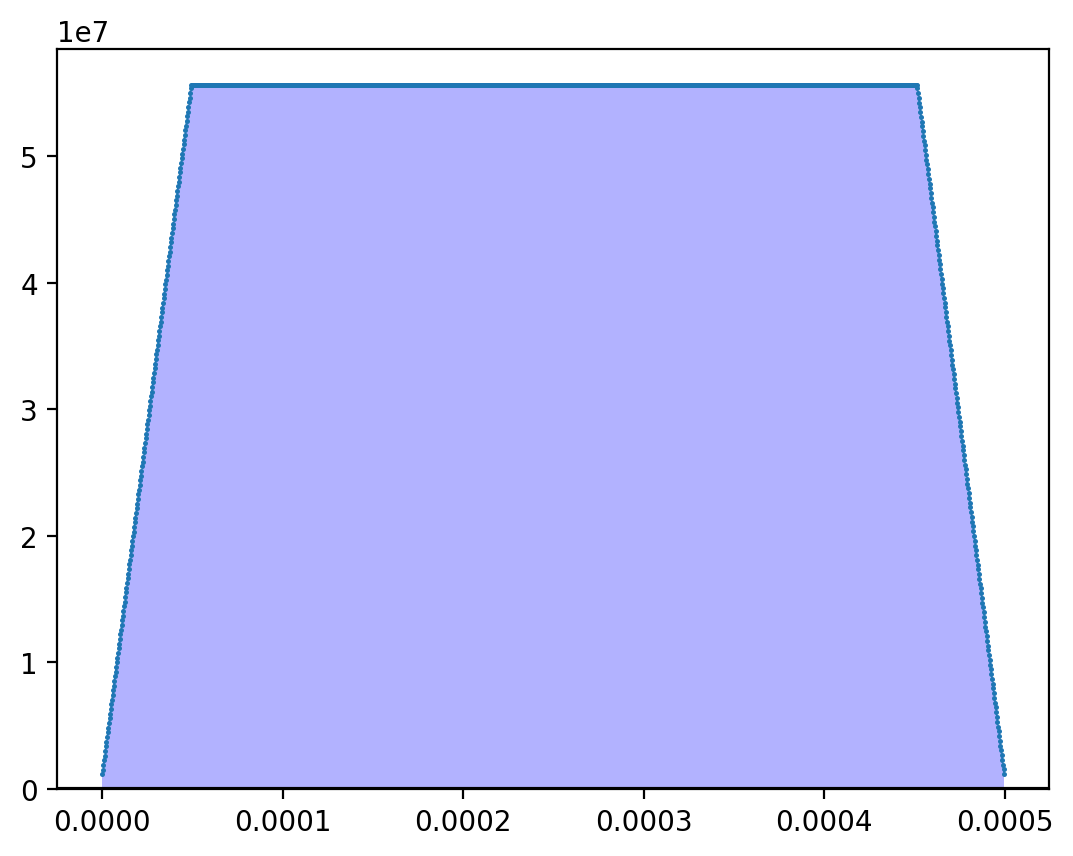

In [18]:
fig, ax = plt.subplots(dpi=200)

samples = 1500

time = np.arange(0, 0.5e-3, 0.5e-3/samples)
dx = time[1] - time[0]
amplitude = rf_parameters_tensor[0]


plt.plot(time, amplitude, '--o', markersize=.8, linewidth=0.5, label='RF Amplitude')
ax.bar(time[:-1], amplitude[:-1], width=dx, align='edge',
       color='blue', alpha=0.3, linewidth=0, label='Rechteck Approximation')
plt.axhline(0, c='black')
plt.show()

In [13]:
np.sum(rf_parameters_tensor[0]) * (0.5e-3 / samples) / 1e3

24.9303224890872

In [14]:
(25.166145747214582 -24.9303224890872) / 24.9303224890872

0.00945929432844721

In [35]:
import torch
test = torch.tensor([1,2,3,4,5,6])
var = 1
test[3:]

tensor([4, 5, 6])

In [ ]:
(25.166145747214582 -24.9303224890872) / 24.9303224890872

0.00945929432844721

In [50]:
import torch
test = torch.tensor([[4,5,6], [4,5,6], [4,5,6]])
x = torch.tensor([[1,1,1], [1,1,1], [1,1,1]])
torch.cat((test, x), 0).shape
x.T

tensor([[1, 1, 1],
        [1, 1, 1],
        [1, 1, 1]])

In [44]:
torch.tensor(np.pi/2, dtype=torch.float32)

tensor(1.5708)

In [47]:
type(50e-3)

float